In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
amazon_raw = pd.read_csv('C:/Users/rabia/Desktop/Thinkful/sentiment/amazon_cells_labelled.txt', delimiter= '\t', header=None)
amazon_raw.columns = ['review', 'sentiment']
amazon_raw.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [35]:
keywords = ['good', 'excellent', 'great', 'impressed', 'recommend', 'well', 'fine', 'best', 'beautiful', 'pretty', 'happy', 
            'like', 'love', 'satisfied', 'joy', 'nice', 'easy', 'perfect', 'glad', 'pleased','quick', 'exactly']

for key in keywords:
    amazon_raw[str(key)] = amazon_raw.review.str.contains(str(key),case=False)

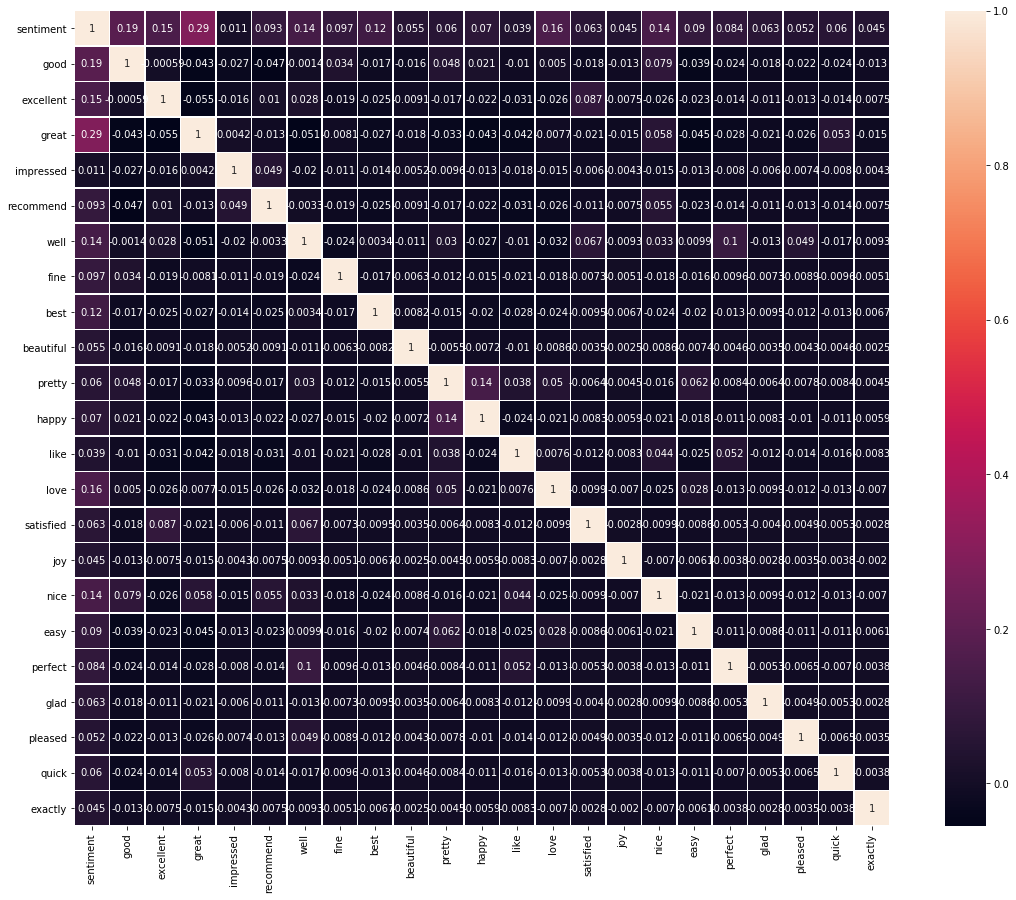

In [19]:
plt.figure(figsize = (20,15))
sns.heatmap(amazon_raw.corr(), square = True, annot = True, linewidths = 0.5)

In [6]:
data = amazon_raw[keywords]
target = amazon_raw['sentiment']

In [7]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 220


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[452,  48],
       [172, 328]], dtype=int64)

Majority of the model errors is coming from times where it failed to identify a positive sentiment. 172 of 220 errors are from failling to identify positive sentiment.

Type I Error (False Positive): the model identified a positive review which is not (48 times)

Type II Error (False Negative): the model mistakenly identified a negative review when it is positive (172 times)

Sensitivity = 328/500 = 65.5% (Percentage of positive review correctly identified)

Specificity = 452/500 = 90.4% (Percentage of negative review correctly identified)

The model performs well in identifying negative reviews which is good and more important than identifying the positive reviews because it will help more on identifying the problems and correct them. the accuracy of idntifying the positive reviews is not as good.

There are not class imbalance in this dataframe. the data is equaly divided between positive and negative reviews, and they are equally represented here

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.76
Testing on Sample: 0.78


In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.86, 0.77, 0.82, 0.72, 0.79, 0.72, 0.78, 0.73, 0.82, 0.75])

Using cross-validation it does not look perfect but not that bad, the model accuracy varies from 0.72 to 0.86. There might be issues with overfitting. We will try to drop some features. We start with features with the highest correlation with the other features

First, we are going to drop the feature "pretty"

In [27]:
amazon_raw2 = amazon_raw.drop(['pretty'], axis = 1)

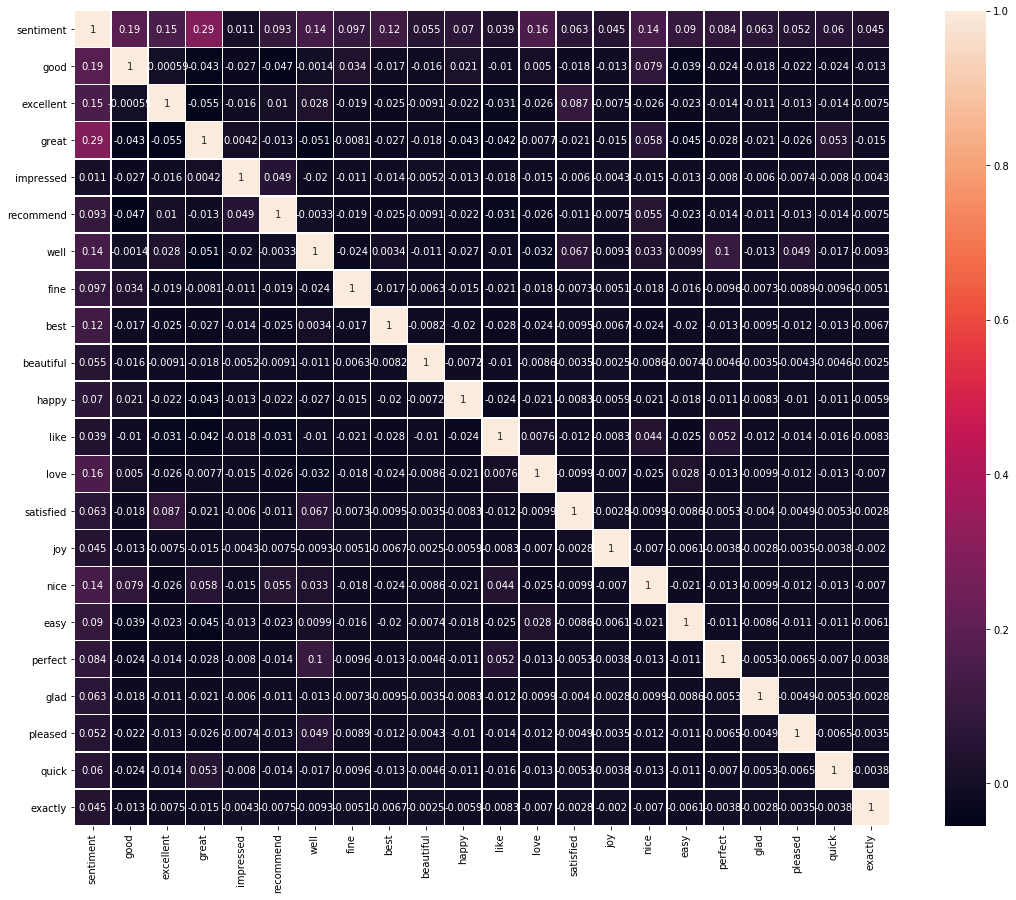

In [28]:
plt.figure(figsize = (20,15))
sns.heatmap(amazon_raw2.corr(), square = True, annot = True, linewidths = 0.5)

In [36]:
keywords.remove('pretty')
data = amazon_raw2[keywords]
target = amazon_raw2['sentiment']
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 220


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[454,  46],
       [174, 326]], dtype=int64)

In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.85, 0.77, 0.82, 0.72, 0.8 , 0.72, 0.77, 0.73, 0.83, 0.76])

In this model we had the same missed points. The sensitivity slightly decreased and the specificity increased. model accuracy variation sliggtly decreased.

Lets pick andother feature to drop. This time feature "well" will be dropped

In [40]:
amazon_raw3 = amazon_raw2.drop(['well'], axis = 1)

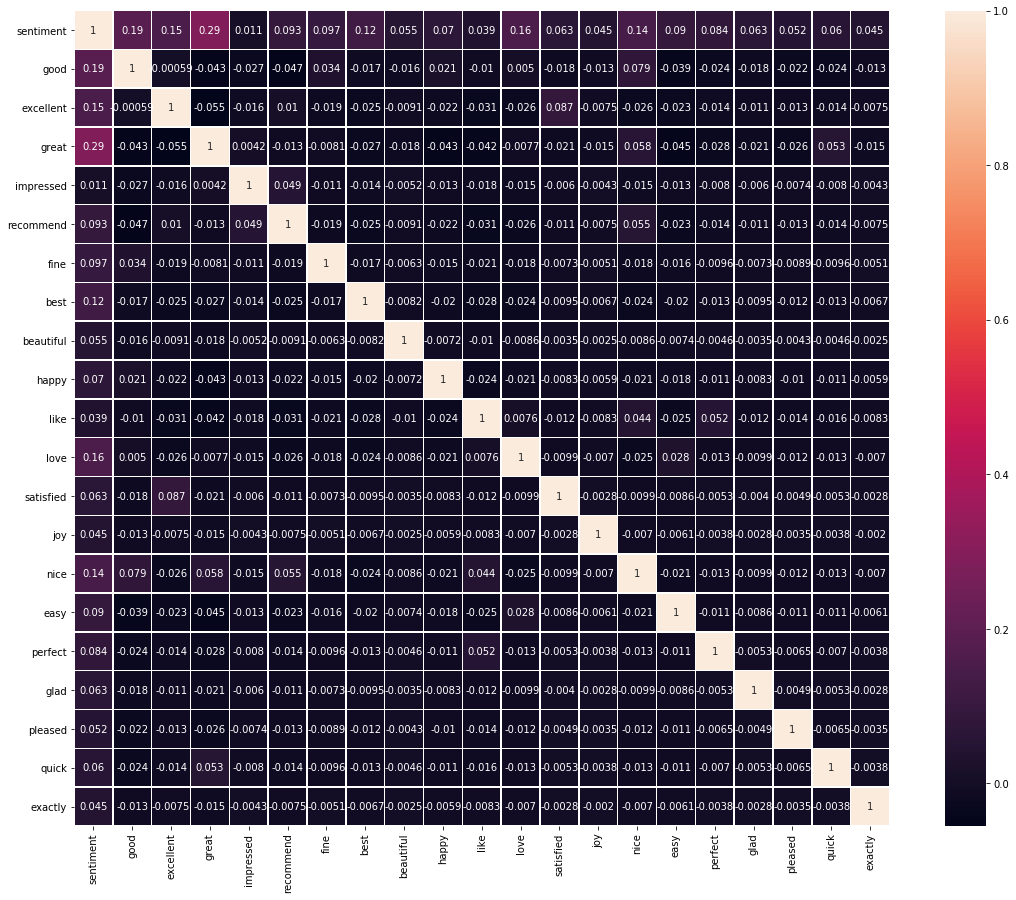

In [41]:
plt.figure(figsize = (20,15))
sns.heatmap(amazon_raw3.corr(), square = True, annot = True, linewidths = 0.5)

In [42]:
keywords.remove('well')
data = amazon_raw3[keywords]
target = amazon_raw3['sentiment']
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 232


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[461,  39],
       [193, 307]], dtype=int64)

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.81, 0.78, 0.83, 0.7 , 0.79, 0.73, 0.76, 0.7 , 0.82, 0.76])

The model missed more points this time. wrong hit increasd by 12 compare to the previous models but specificity increased and sensitivity decreased. it is good if we want to correctly identify the negative reviews

Sensitivity = 307/500 = 61.4% (Percentage of positive review correctly identified)

Specificity = 461/500 = 92.2% (Percentage of negative review correctly identified)

Cross validation much better now. the varuiation of model accuracy ecreased (0.70 - 0.81)

This time we will try to drop another feature which is 'satiosfied'

In [45]:
amazon_raw4 = amazon_raw3.drop(['satisfied'], axis = 1)

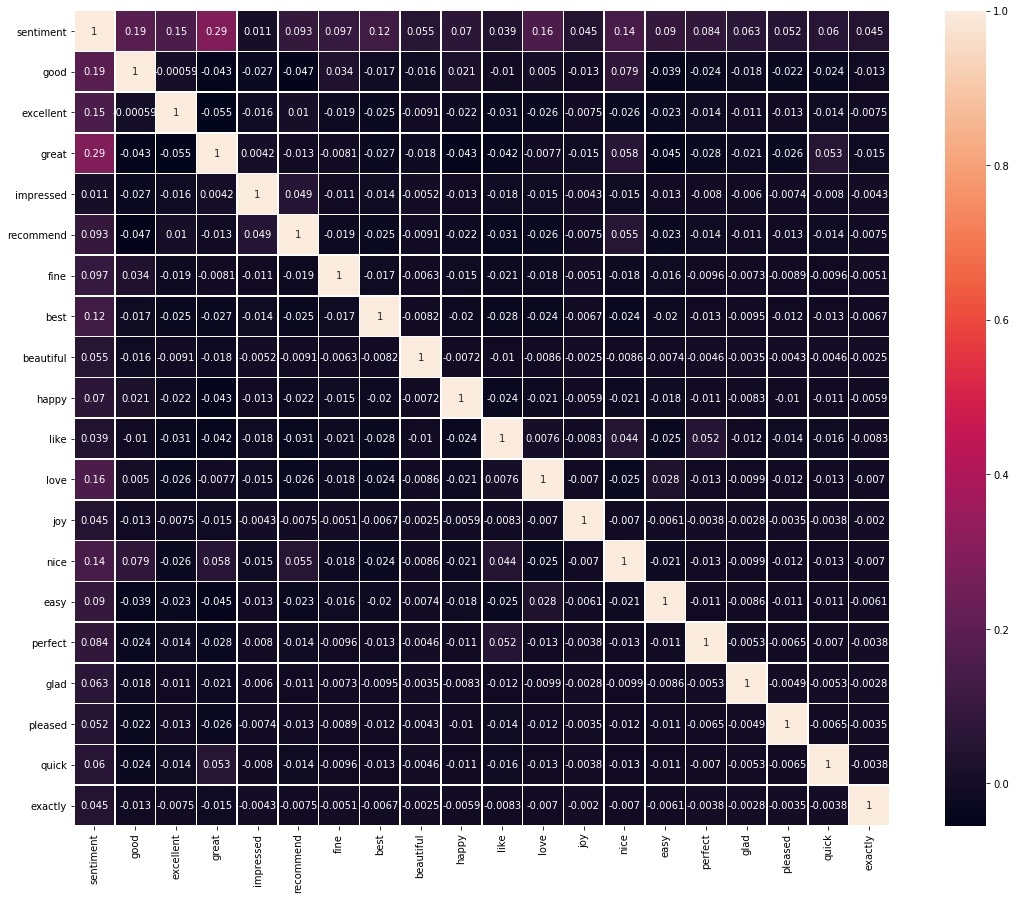

In [47]:
plt.figure(figsize = (20,15))
sns.heatmap(amazon_raw4.corr(), square = True, annot = True, linewidths = 0.5)

In [66]:
keywords.remove('satisfied')
data = amazon_raw4[keywords]
target = amazon_raw4['sentiment']
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 235


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[461,  39],
       [196, 304]], dtype=int64)

In [50]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.81, 0.78, 0.83, 0.7 , 0.79, 0.71, 0.76, 0.7 , 0.81, 0.76])

No big change with dropping "satisfied" from the model. it just slightly decreased sensitivity of the model. The variation of the model accuracy does not change through cross validation. returning "saisfied" to the model is better than dropping it and add another feature "comfortable" and check what is going to happen

In [71]:
amazon_raw5 =  amazon_raw
keywords.extend(['satisfied', 'comfortable'])
for key in keywords:
    amazon_raw5[str(key)] = amazon_raw.review.str.contains(str(key),case=False)

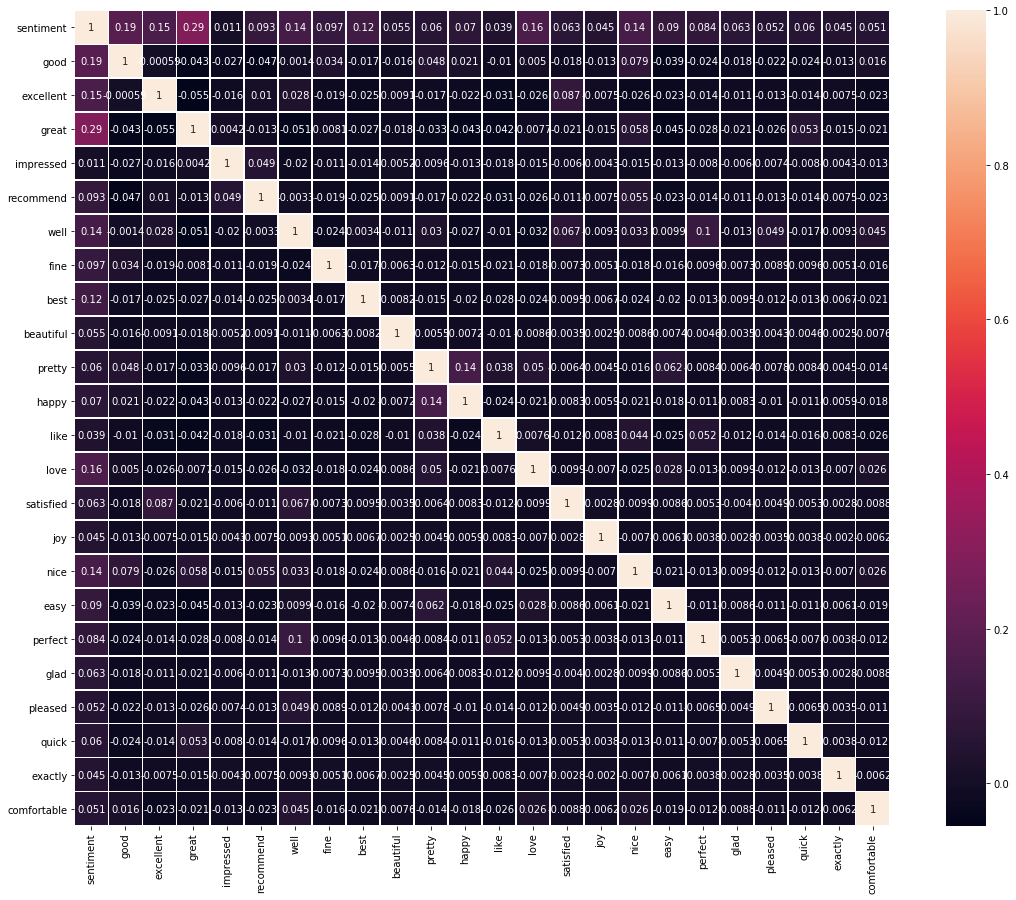

In [72]:
plt.figure(figsize = (20,15))
sns.heatmap(amazon_raw5.corr(), square = True, annot = True, linewidths = 0.5)

In [73]:
data = amazon_raw5[keywords]
target = amazon_raw5['sentiment']
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0], (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 227


In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[455,  45],
       [182, 318]], dtype=int64)

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.81, 0.78, 0.84, 0.71, 0.77, 0.72, 0.77, 0.71, 0.82, 0.76])

Returning "satisfied" and adding "comfortable" makes the model better with only 227 missing points. 

Sensitivity = 318/500 = 63.6% (Percentage of positive review correctly identified)

Specificity = 455/500 = 91% (Percentage of negative review correctly identified)

it might not be the best sensitivity and subjectivity but they are not far from previous models. the most important is the variation of accuracy decreased a little (0.71 - 0.81)

The dropped clasifiers ('wells', 'pretty') seems a little overfit since the cariation of accuracy decreased a little by dropping them

the clasfied ('great') is the best performing classifier. it has the highest correlation with the target variable among all classifiers (0.29)

